In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

In [17]:
demand_df = pd.read_csv('../../2021-dotson-ms/data/uiuc_demand_data.csv', 
                        index_col='time', 
                        parse_dates=True,
                        usecols=['time', 'kw'])
demand_df.head()

,kw
time,
2015-01-01 00:00:00,41903.0
2015-01-01 01:00:00,43479.0
2015-01-01 02:00:00,43572.0
2015-01-01 03:00:00,43253.0
2015-01-01 04:00:00,43566.0


<AxesSubplot:xlabel='time'>

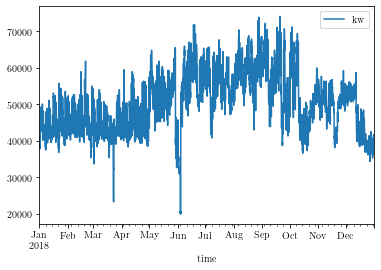

In [18]:
demand_df[(demand_df.index.year > 2017) & (demand_df.index.year < 2019)].plot()

In [19]:
demand_df[demand_df['kw'] < 32e3] = np.nan
demand_df.isnull().sum()

kw    120
dtype: int64

In [20]:
demand_df = demand_df.interpolate('linear')
demand_df.isnull().sum()

kw    0
dtype: int64

In [21]:
demand_df['kw'] = demand_df['kw'] / demand_df['kw'].max()

In [22]:
grouped = demand_df.groupby(demand_df.index.year)
frames = []
for g in grouped.groups:
    df = grouped.get_group(g)
    df.reset_index(inplace=True, drop=True)
    frames.append(df)
df2 = pd.concat(frames, axis=1)
df2['demand_mean'] = df2.mean(axis=1)

In [23]:
df2

,kw,kw,kw,kw,kw,demand_mean
0,0.513505,0.495466,0.531176,0.487415,0.455626,0.496637
1,0.532818,0.492917,0.527732,0.506593,0.469265,0.505865
2,0.533958,0.493803,0.527377,0.501066,0.461177,0.503476
3,0.530048,0.491875,0.531433,0.500858,0.465160,0.503875
4,0.533884,0.489342,0.530391,0.489804,0.451411,0.498966
...,...,...,...,...,...,...
8779,NaN,0.493836,NaN,NaN,NaN,0.493836
8780,NaN,0.501287,NaN,NaN,NaN,0.501287
8781,NaN,0.505012,NaN,NaN,NaN,0.505012
8782,NaN,0.536678,NaN,NaN,NaN,0.536678


In [25]:
df3 = demand_df.copy()
df3['interval'] = 1
df3 = df3.sort_values(by=['kw'], ascending=False)
df3['duration'] = df3['interval'].cumsum()
df3['percentage'] = df3['duration']*100/len(df3)
df3

,kw,interval,duration,percentage
time,,,,
2015-11-10 10:00:00,1.000000,1,1,0.002538
2016-09-07 11:00:00,0.991863,1,2,0.005075
2017-05-10 15:00:00,0.977917,1,3,0.007613
2017-05-09 15:00:00,0.976888,1,4,0.010150
2015-11-10 09:00:00,0.973849,1,5,0.012688
...,...,...,...,...
2018-03-23 10:00:00,0.392772,1,39403,99.989850
2016-04-02 04:00:00,0.392766,1,39404,99.992387
2016-04-02 05:00:00,0.392700,1,39405,99.994925


In [33]:
df2_average = df2.copy()
df2_average['interval'] = 1
df2_sorted = df2_average.sort_values(by=['demand_mean'], ascending=False)
df2_sorted['duration'] = df2_sorted['interval'].cumsum()
df2_sorted['percentage'] = df2_sorted['duration']*100/len(df2_sorted)
df2_sorted['demand_mean'] = df2_sorted['demand_mean']/df2_sorted['demand_mean'].max()
df2_sorted

,kw,kw,kw,kw,kw,demand_mean,interval,duration,percentage
5823,0.883091,0.913813,0.771635,0.841058,NaN,1.000000,1,1,0.011384
5821,0.892356,0.907245,0.785826,0.815262,NaN,0.997387,1,2,0.022769
5822,0.889745,0.883888,0.794613,0.820544,NaN,0.993897,1,3,0.034153
5819,0.892539,0.883177,0.777089,0.822039,NaN,0.989807,1,4,0.045537
5820,0.865702,0.904855,0.771329,0.814845,NaN,0.984495,1,5,0.056922
...,...,...,...,...,...,...,...,...,...
1945,0.492304,0.440541,0.498395,0.436379,0.449560,0.543684,1,8780,99.954463
1947,0.494118,0.431313,0.501164,0.426688,0.454107,0.541387,1,8781,99.965847
2068,0.486826,0.450957,0.407196,0.507941,0.451116,0.540600,1,8782,99.977231
1946,0.489510,0.428053,0.496091,0.431534,0.456986,0.540163,1,8783,99.988616


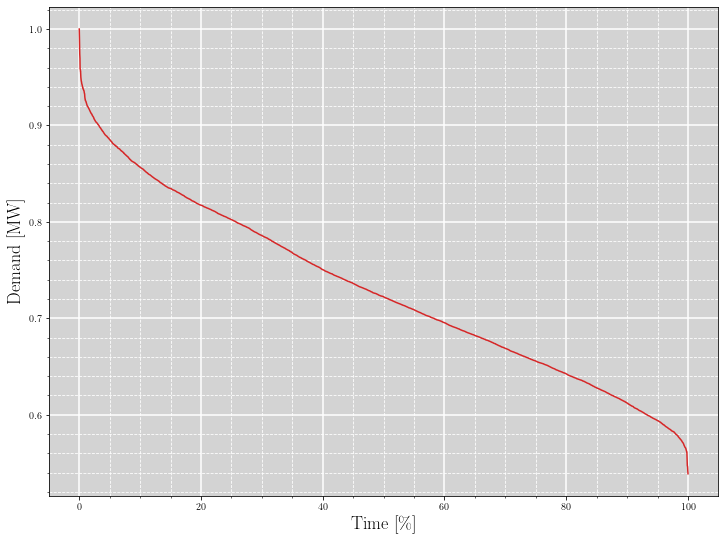

In [34]:
fig, ax = plt.subplots(figsize=(12,9))
sb.lineplot(ax=ax,x='percentage', y='demand_mean', data=df2_sorted, color='tab:red')
ax.set_ylabel('Demand [MW]', fontsize=18)
ax.set_xlabel(r'Time [\%]', fontsize=18)
ax.minorticks_on()
ax.grid(which='major', color='w', lw=1.5)
ax.grid(which='minor', color='w', linestyle='--')
ax.set_facecolor('lightgray')

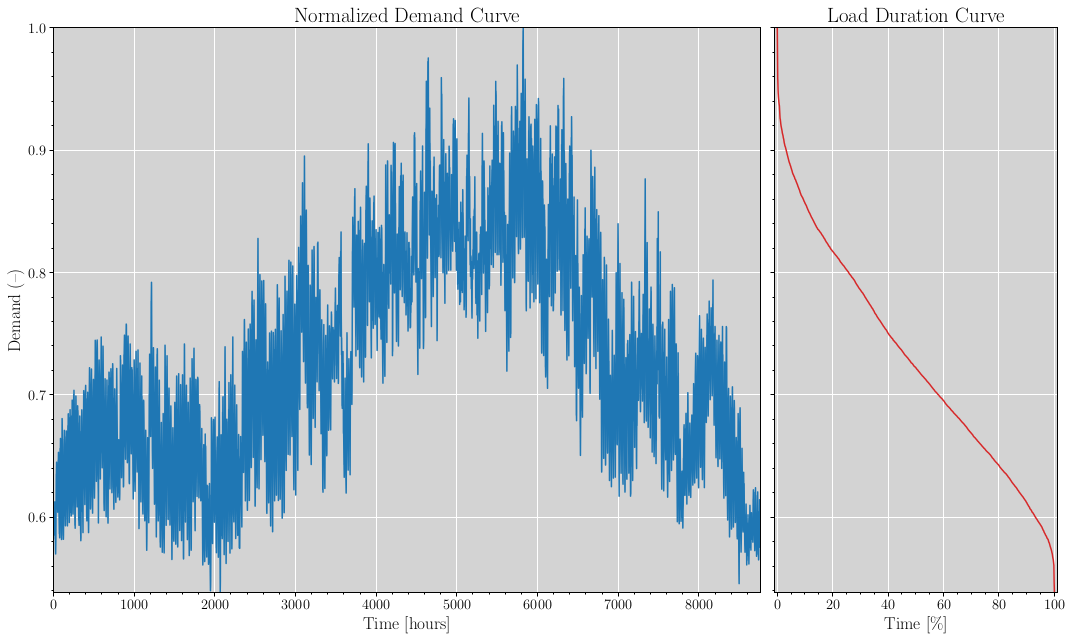

In [39]:
fig, axes = plt.subplots(1,2,figsize=(15,9), gridspec_kw={'width_ratios':[2.5,1]}, sharey=True, 
                         edgecolor='k', facecolor='w')
ax1 = axes[0]
ax2 = axes[1]
# demand_df.plot(ax=ax1, legend=False)
(df2[['demand_mean']]/df2['demand_mean'].max()).plot(ax=ax1, legend=False)
# (pjm.reset_index().sort_values(by=['Demand (MW)'], ascending=False)).plot(ax=ax2)
# sb.lineplot(ax=ax2,x='percentage', y='demand_mean', data=pjm_sorted, color='tab:red')
sb.lineplot(ax=ax2,x='percentage', y='demand_mean', data=df2_sorted, color='tab:red')
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
ax1.minorticks_on()
ax2.minorticks_on()
ax1.grid(color='w')
ax2.grid(color='w')
ax1.set_ylim(min(df2_sorted['demand_mean']), max(df2_sorted['demand_mean']))
ax1.set_xlim(0,8760)
ax1.set_title('Normalized Demand Curve', fontsize=20)
ax2.set_title('Load Duration Curve', fontsize=20)
ax1.tick_params(axis='both', labelsize=14, rotation=0)
ax2.tick_params(axis='both', labelsize=14, rotation=0)
ax1.set_ylabel('Demand (--)', fontsize=18)
ax1.set_xlabel('Time [hours]', fontsize=18)
ax2.set_xlabel(r'Time [\%]', fontsize=18)
ax2.set_xlim(-1,101)
plt.tight_layout()
plt.savefig('../docs/figures/normalized_load_curves.pgf')